In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np
import astropy.constants as c
import astropy.units as u

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

In [3]:
seds_EH = np.genfromtxt('SEDs_Hammerstein2023.txt')
time_EH = np.genfromtxt('time_SEDs_Hammerstein2023.txt')

seds_mosfit = np.genfromtxt('SEDs_mosfit.txt')
time_mosfit= np.genfromtxt('time_SEDs_mosfit.txt')

frequency = np.genfromtxt('frequency.txt')

In [4]:
tmin =  time_mosfit[0]
tmax = time_mosfit[-1]

colormap = cm.get_cmap('Spectral_r')
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=tmin,vmax=tmax))
sm.set_array([]) 

/tmp/ipykernel_429373/2987298511.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Spectral_r')


/tmp/ipykernel_429373/617279301.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


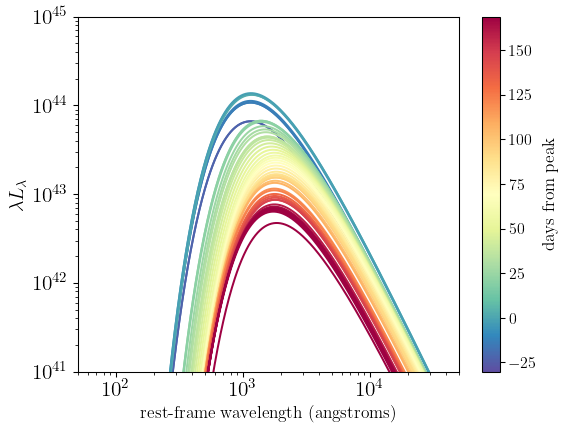

In [5]:
for lnui, lnu in enumerate(seds_EH):
    plt.plot(c.c.cgs.value/frequency * 1e8, 
             frequency*lnu, color = sm.to_rgba(time_EH[lnui]))
    
    

plt.yscale('log')
plt.xscale('log')

plt.xlabel('rest-frame wavelength (angstroms)', fontsize = 13)
plt.ylabel('$\\lambda L_\\lambda$', fontsize = 15)

plt.ylim(1e41, 1e45)
plt.xlim(50, 5e4)

cbar = plt.colorbar(sm)
plt.setp(cbar.ax.get_yticklabels(), fontsize = 12)
cbar.set_label('days from peak', fontsize = 13) 

plt.show()

/tmp/ipykernel_429373/635071540.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


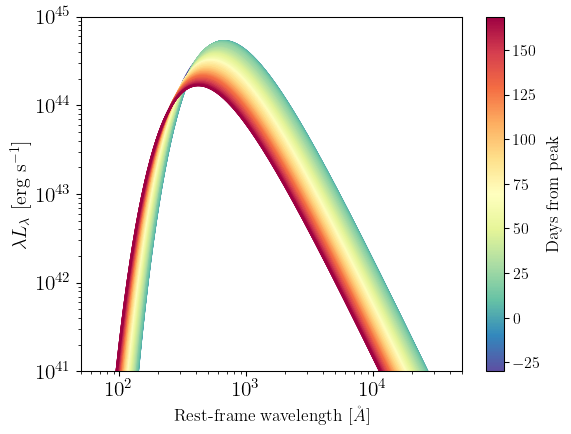

In [16]:
for lnui, lnu in enumerate(seds_mosfit):
    plt.plot(c.c.cgs.value/frequency * 1e8, frequency*lnu,
             color = sm.to_rgba(time_mosfit[lnui]))

plt.yscale('log')
plt.xscale('log')

plt.xlabel('Rest-frame wavelength [$\\r{A}$]', fontsize = 13)
plt.ylabel('$\\lambda L_\\lambda$ [erg s$^{-1}$]', fontsize = 15)

plt.ylim(1e41, 1e45)
plt.xlim(50, 5e4)

cbar = plt.colorbar(sm)
plt.setp(cbar.ax.get_yticklabels(), fontsize = 12)
cbar.set_label('Days from peak', fontsize = 13) 

plt.savefig("mosfit_SED.pdf")
plt.show()

In [8]:
np.shape(seds_mosfit)

(293, 1000)

In [11]:
np.shape(time_mosfit)

(293,)

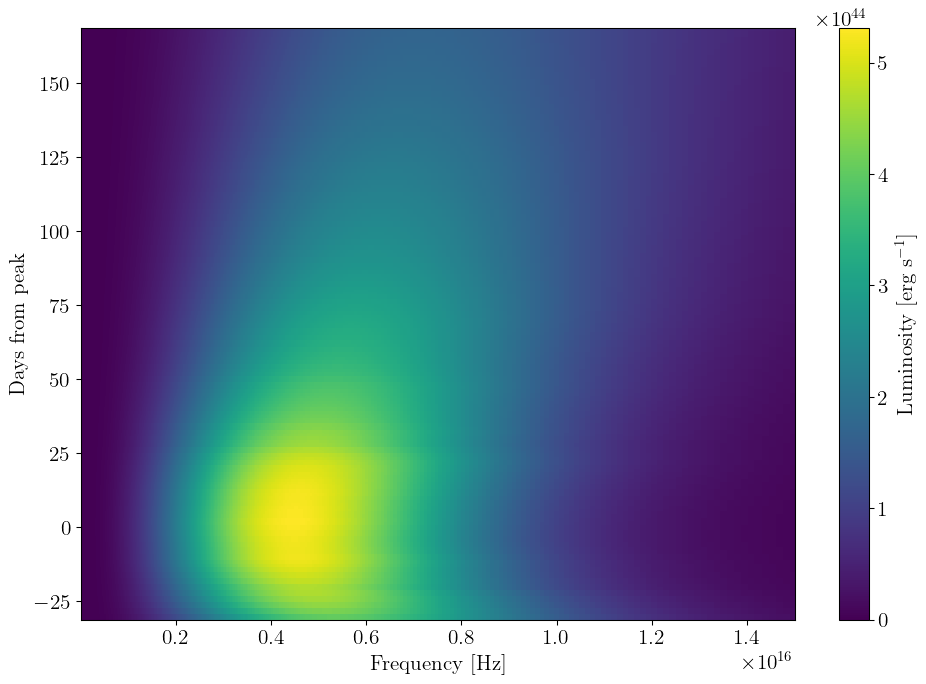

In [17]:
plt.figure(figsize=(12, 8))
#plt.pcolormesh(c.c.cgs.value/frequency * 1e8, time_mosfit, frequency*seds_mosfit, shading='auto')
plt.pcolormesh(frequency, time_mosfit, frequency*seds_mosfit, shading='auto')
plt.colorbar(label='Luminosity [erg s$^{-1}$]')
plt.xlabel('Frequency [Hz]')
plt.xlim(right=0.15e17)
plt.ylabel('Days from peak')
#plt.title('Spectral Energy Distribution Over Time')

plt.savefig("L_fn.pdf")
plt.show()

/tmp/ipykernel_359714/3618555439.py:5: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpolator = interp2d(frequency, time, frequency*seds, kind='linear')
/tmp/ipykernel_359714/3618555439.py:10: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new

Luminosity at time 100 and frequency 5000000000000000.0: 2.3472631222852157e+44


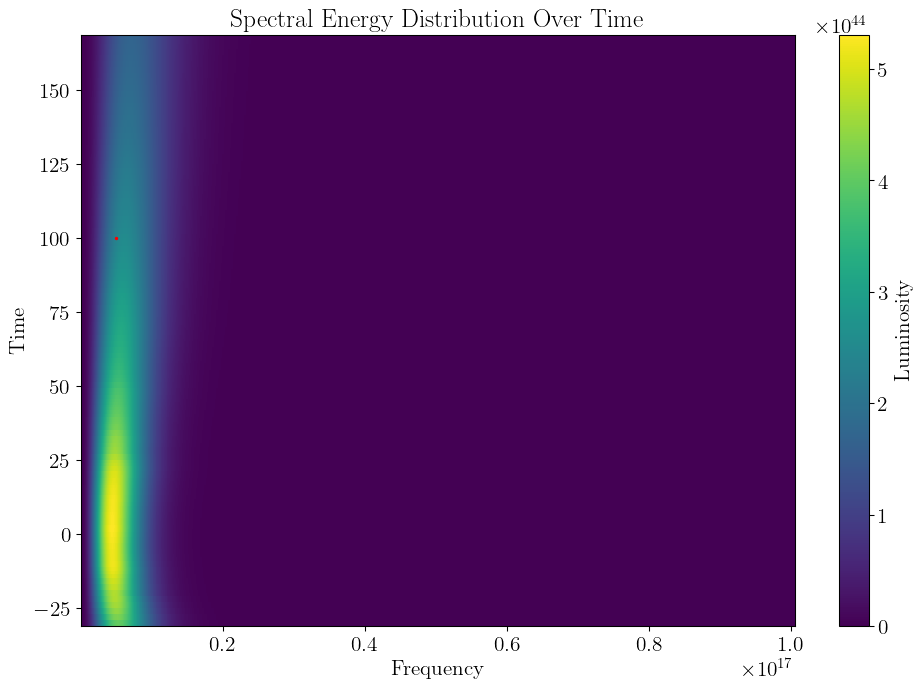

In [29]:
from scipy.interpolate import interp2d

# Create the interpolation function
def create_interpolator(seds, time, frequency):
    interpolator = interp2d(frequency, time, frequency*seds, kind='linear')
    return interpolator

# Define the function to get luminosity
def get_luminosity(interpolator, input_time, input_frequency):
    return interpolator(input_frequency, input_time)[0]

# Example usage
interpolator = create_interpolator(seds_mosfit, time_mosfit, frequency)
input_time = 100  # example input time
input_frequency = 5e15  # example input frequency
luminosity = get_luminosity(interpolator, input_time, input_frequency)
print(f"Luminosity at time {input_time} and frequency {input_frequency}: {luminosity}")

# Plot the data to verify
plt.figure(figsize=(12, 8))
plt.pcolormesh(frequency, time_mosfit, frequency*seds_mosfit, shading='auto')
plt.colorbar(label='Luminosity')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.title('Spectral Energy Distribution Over Time')
plt.scatter([input_frequency], [input_time], color='red')  # Mark the input point
plt.show()

In [32]:
from scipy.interpolate import RegularGridInterpolator

def create_interpolator(seds, time, frequency):
    interpolator = RegularGridInterpolator((time, frequency), seds)
    return interpolator

# Define the function to get luminosity
def get_luminosity(interpolator, input_time, input_frequency):
    return interpolator((input_time, input_frequency))

# Example usage
interpolator = create_interpolator(seds_mosfit, time_mosfit, frequency)
input_time = 500  # example input time
input_frequency = 5e14  # example input frequency
luminosity = get_luminosity(interpolator, input_time, input_frequency)
print(f"Luminosity at time {input_time} and frequency {input_frequency}: {luminosity}")

# Plot the data to verify
plt.figure(figsize=(12, 8))
plt.pcolormesh(frequency, time_mosfit, seds_mosfit, shading='auto')
plt.colorbar(label='Luminosity')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.title('Spectral Energy Distribution Over Time')
plt.scatter([input_frequency], [input_time], color='red')  # Mark the input point
plt.show()

ValueError: One of the requested xi is out of bounds in dimension 0